In [1]:
rm(list = ls())
library("dplyr")
library("data.table")
options(scipen=999)
set.seed(10)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last




In [2]:
# total number of users under study
num_users <- 1000 

u_id <- seq(1,num_users)

u_age <- sample(c(1,2,3,4,5,6),num_users,replace=T,prob=c(0.1,0.30,0.35,0.15,0.05,0.05))
# 1=<18 2=[18,25) 3=[25,35) 4=[35,45), 5=[45,55), 6=>55

u_gender <- sample(c(1,2),num_users,replace=T,prob=c(0.6,0.4))
# 1=M, 2=F

u_weekly_utilisation <- sample(0:7,num_users,replace=T)
# number of days using the service in a week

u_sub_utilisation <- round(runif(num_users,0,1),4)
# proportion of time spent on the service since the first subscription

u_rating_given <- sample(0:5,num_users,replace=T)
# rating on a scale from 0 to 5 given by each user to the platform

u_format_pref <- sample(c(1,2,3),num_users,replace=T,prob=c(0.5,0.4,0.1))
# 1=TV-series, 2=movies, 3=documentaries

u_genre_pref <- sample(1:7,num_users,replace=T)
# 1=action, 2=comedy, 3=romance, 4=sci-fi, 5=animation, 6=drama, 7=horror

u_other_sub <- sample(0:1,num_users,replace=T)
# binary variable where 0=not subscribed to other streaming platforms, 1=yes

# creating the data table with all the users
USERS <- data.table(u_id, u_gender, u_age, u_weekly_utilisation, u_sub_utilisation, u_format_pref,
                    u_genre_pref, u_rating_given, u_other_sub)


In [3]:
USERS

u_id,u_gender,u_age,u_weekly_utilisation,u_sub_utilisation,u_format_pref,u_genre_pref,u_rating_given,u_other_sub
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
1,2,2,7,0.6138,2,6,4,1
2,2,3,1,0.1074,2,6,1,0
3,1,2,3,0.5186,1,6,2,0
4,1,4,3,0.8811,2,2,5,1
5,1,3,5,0.3801,2,3,4,0
6,1,3,1,0.2234,2,2,4,0
7,1,3,0,0.2152,2,6,3,1
8,1,3,5,0.1873,2,1,5,0
9,2,2,2,0.5200,2,5,5,1


   
      1   2   3   4   5
  1 112   0   0   0   0
  2   0 116 127  53   0
  3   0 117 145  80   0
  4   0  12 111  27   0
  5   0   9  37  10   0
  6   0   0  14   0  30

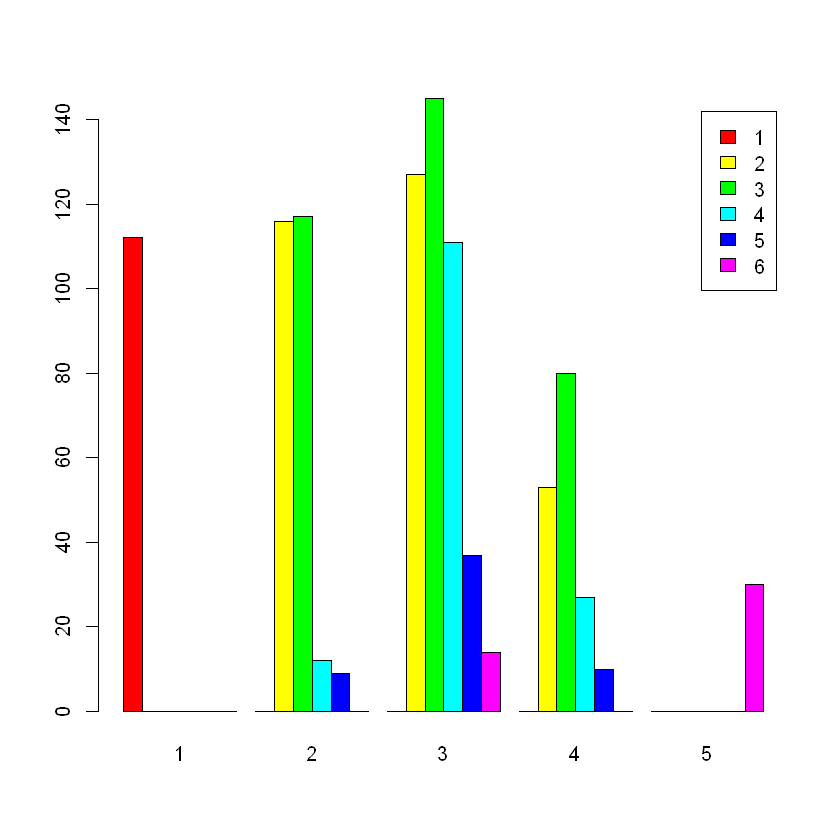

In [4]:
# defining the users' occupation variable based on some conditions
USERS$u_occupation[u_age==1] <- 1
USERS$u_occupation[u_age==2|u_age==3] <- sample(c(2,3,4),nrow(USERS[u_age==2|u_age==3]),replace=T,prob=c(0.4,0.4,0.2))
USERS$u_occupation[u_age==4|u_age==5] <- sample(c(2,3,4),nrow(USERS[u_age==4|u_age==5]),replace=T,prob=c(0.1,0.7,0.2))
USERS$u_occupation[u_age==6] <- sample(c(3,5),nrow(USERS[u_age==6]),replace=T,prob=c(0.3,0.7))
# occupation: 1=student 2=part-time 3=full-time 4=unemployed 5=retired
# age: 1=<18 2=[18,25) 3=[25,35) 4=[35,45), 5=[45,55), 6=>55

table(USERS$u_age, USERS$u_occupation)
barplot(table(USERS$u_age, USERS$u_occupation), beside=T, legend=T, col=rainbow(6))

In [5]:
# we suppose that our streaming service is focused on action and sci-fi tv-series 
# u_genre_pref(1=action||4=sci-fi), u_format_pref(1=series), u_age(-), u_occupation(-)
# u_other_sub(-), u_rating_given(+), u_sub_utilisation(+), u_weekly_utilisation(+)
# add error term from rnorm

**First Step**: Ho scorporato il calcolo  della parte "deterministica" dello utility score, aggiungendo il noise solo successivamente. <br>
Rispetto alla presentazione di stamani, ho leggermente cambiato terminologia per rendere più chiaro il codice. In particolare, ho chiamato **baseline_score** lo score definito secondo la funzione che avete scritto sopra (componente deterministica + componente stocastica). Questo score è lo score per tutti i customer *prima* del trattamento. 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -112.4   410.4   636.8   630.6   864.4  1320.1 

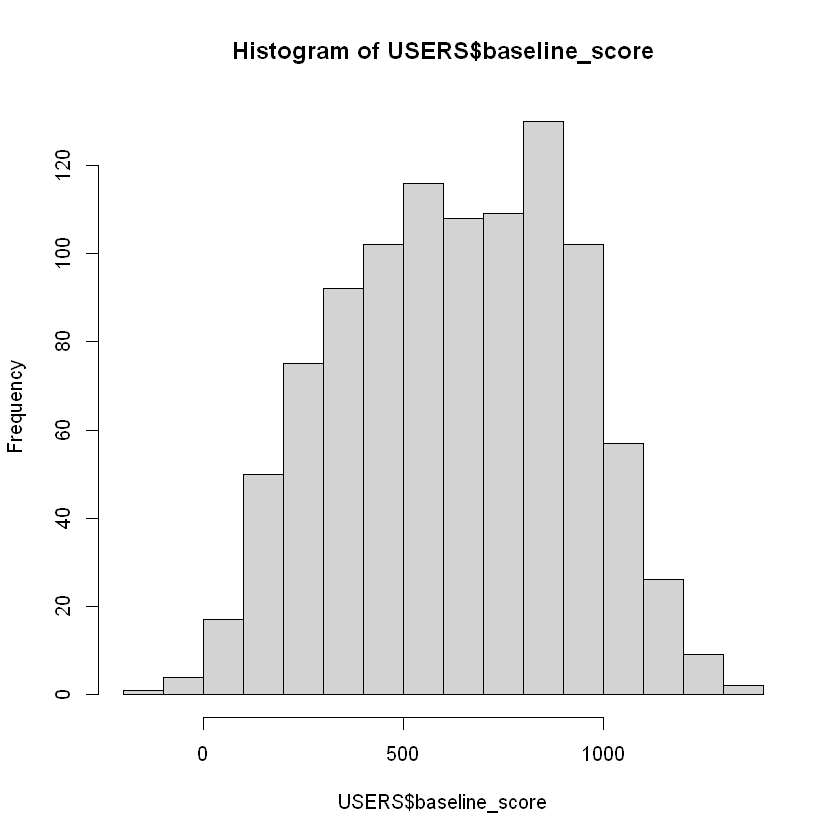

In [6]:
# score = u_genre_pref(1|4) 80 + u_format_pref(1) 100 + u_age(1|2) 30 - u_age(3|4|5|6) 30 
#         + u_occupation(1|4|5) 30 - u_occupation(2|3) 30 - u_other_sub*55 + u_rating_given*50
#         + u_sub_utilisation*130 + u_weekly_utilisation*115 + error 
# NB: coefficients arbitrarly given
# USERS[,score:=u_rating_given*50+u_sub_utilisation*130+u_weekly_utilisation*115-u_other_sub*55+rnorm(1)*100]

# Deterministic Portion of Utility
USERS[,baseline_score:=u_rating_given*50+u_sub_utilisation*130+u_weekly_utilisation*115-u_other_sub*55]
USERS[u_genre_pref==1|u_genre_pref==4, baseline_score:=baseline_score+80]
USERS[u_format_pref==1, baseline_score:=baseline_score+100]
USERS[,baseline_score:=ifelse(u_age==1|u_age==2,baseline_score+30,baseline_score-30)] 
USERS[,baseline_score:=ifelse(u_occupation==2|u_occupation==3,baseline_score-30,baseline_score+30)] 

summary(USERS$baseline_score)
hist(USERS$baseline_score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -10.29  512.54  738.95  732.72  966.51 1422.23 

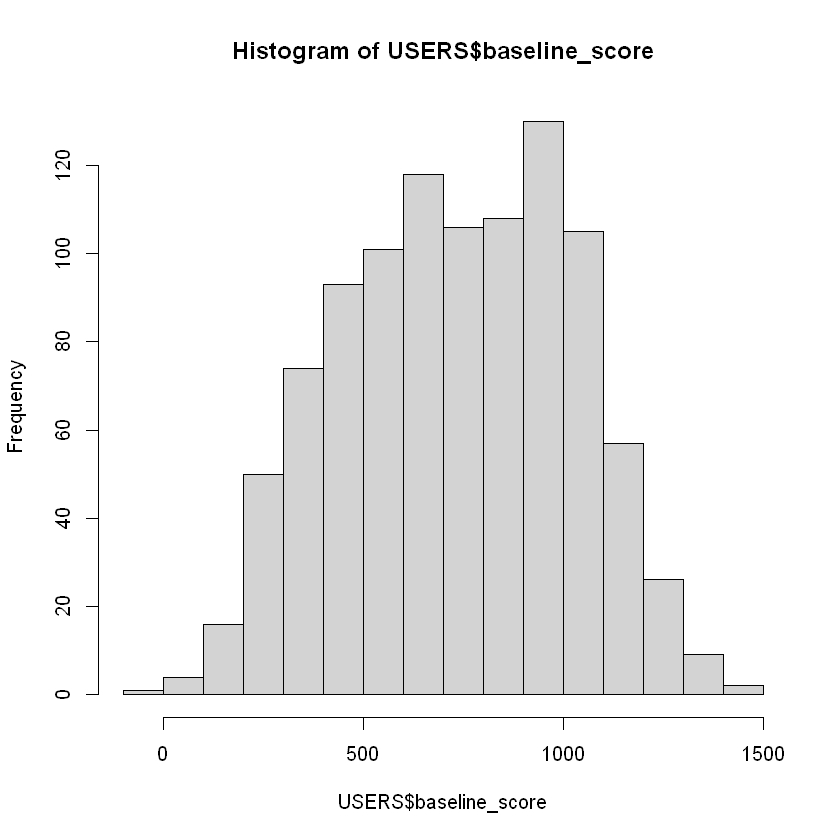

In [7]:
# Random Component of Utility (observable to customers but unobservable to the econometrician)
USERS$baseline_score=USERS$baseline_score+rnorm(1,0,300)

# NOTE: Remember to set appropriate size for the noise

summary(USERS$baseline_score)
hist(USERS$baseline_score)

**Second Step**: Ho creato il treatment effect. Si compone di due parti: una parte stocastica (positiva in media) e una parte  deterministica che dipende dalle interazioni con altra caratteristiche individuali (tipo età, occupation, etc).  <br>

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00   34.12   67.84  117.91 

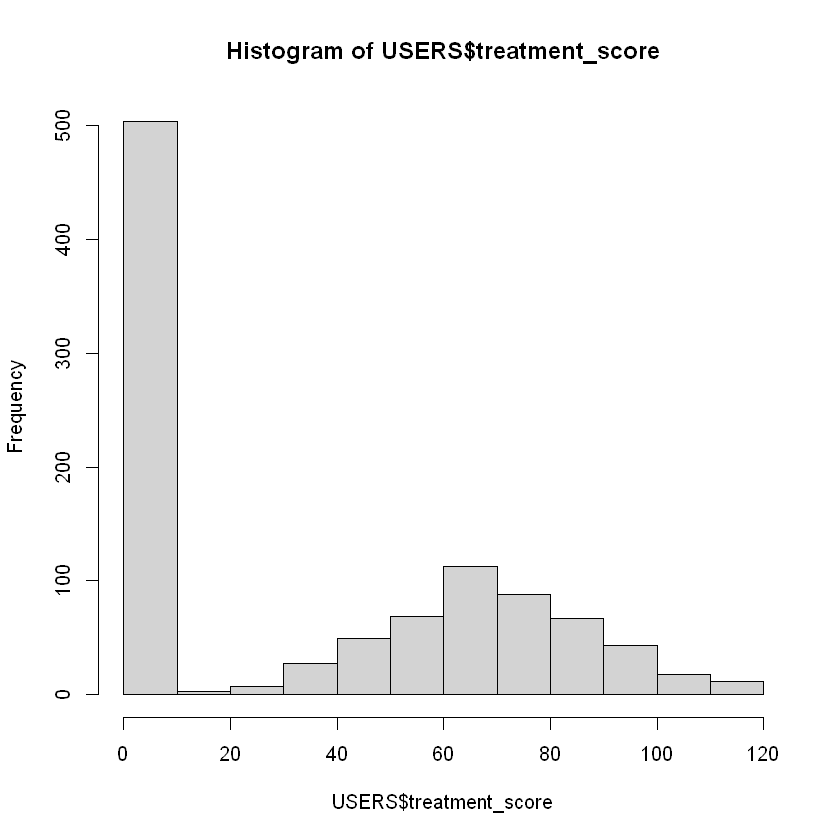

In [8]:
# Creating Treatment Effects

# treatment variable randomly assigned to the users
USERS$treated <- sample(0:1,num_users,replace=T)

# The impact of our policy can be divided into two components: 
# First: an additive component independent of covariates and positive on average
USERS[,treatment_score:=ifelse(treated==1,rnorm(num_users,70,20),0)]
summary(USERS$treatment_score)
hist(USERS$treatment_score)
# NOTE: Remember to set appropriate size for the random component

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00   69.35  131.10  282.89 

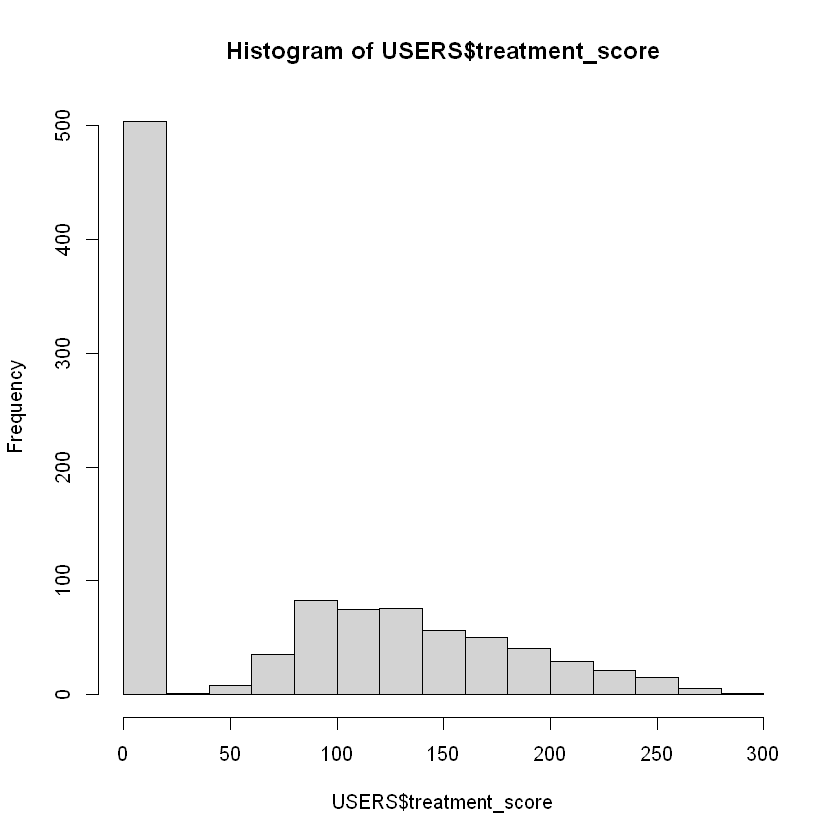

In [9]:
# Second: part of the effect depends on some user's characteristics (interactions).
# For example, #to capture the higher price sensitivity of young people and students/unemployed:
USERS[treated==1,treatment_score:=ifelse(u_age==1|u_age==2,treatment_score+50,treatment_score)]
USERS[treated==1,treatment_score:=ifelse(u_occupation==2|u_occupation==3|u_occupation==5,treatment_score,treatment_score+70)] 
# We may assume we face different degrees of competition depending on the favorite genre of users: 
USERS[treated==1,treatment_score:=ifelse(u_genre_pref==2|u_genre_pref==3,treatment_score,treatment_score+30)] 
# Finally, a voucher would reduce multihoming costs of being subscribed to multiple platforms
USERS[u_other_sub==1&treated==1, treatment_score:=treatment_score+20]

# Overall, we get
summary(USERS$treatment_score)
hist(USERS$treatment_score)

**Third  Step**: Ho aggregato il baseline score e il treatment score insieme, generano il **total_score**. Quest'ultimo è il valore che determina la decisione di resub per il consumatore (resub se total_score > di una data threshold). Se il customer appartiene al gruppo di controllo non ha ricevuto il trattamento e quindi treatment_score=0 e di conseguenza total_score=baseline_score.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  69.46  578.10  812.68  802.07 1027.15 1655.20 

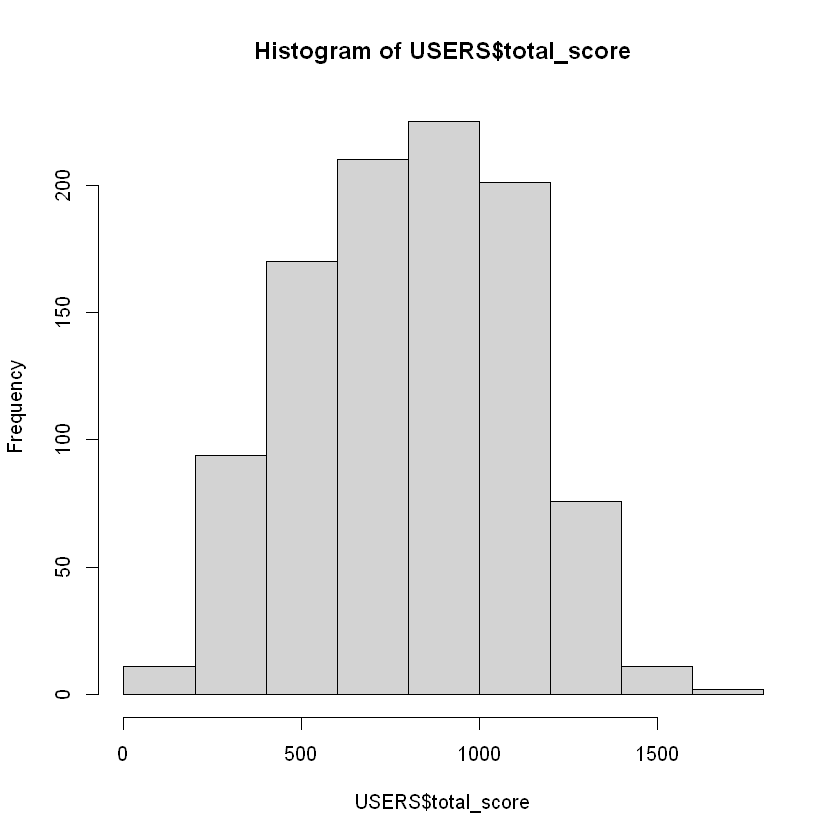

In [10]:
# Unifying baseline and treatment  scores
USERS$total_score=USERS$baseline_score+USERS$treatment_score
summary(USERS$total_score)
hist(USERS$total_score)

**Step Four**: Generare le scelte di resub dei consumatori. Una volta generato il total_score, tutto sta nello scegliere la threshold sopra la quale l'utente fa resub. Dopo la chiamata di stamani, ho controllato velocemente in rete il monthly churn rate delle piattaforme di streaming, direi che possiamo scendere intorno al 15%. L'idea è, se in media ogni mese churna il 15% degli utenti, è ragionevole pensare che a farlo siano quelli con l'utilità più basse (lowest 15%). Il monthly churn rate medio è determinato assumendo nessuna campagna di retention in corso (ipotizziamo che l'azienda guardi ai mesi precedenti), e dunque la theshold relativa secondo me dovrebbe essere calcolata sul *baseline_score*, che non include l'effetto del trattamento. 

In [11]:
#How to assign churn?
#Assume that 15% of customer churn
threshold_churn=quantile(USERS$baseline_score, prob=c(.15))
USERS[,resub:=ifelse(total_score>threshold_churn,1,0)] 
summary(USERS$resub)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   1.000   0.891   1.000   1.000 

In [12]:
USERS

u_id,u_gender,u_age,u_weekly_utilisation,u_sub_utilisation,u_format_pref,u_genre_pref,u_rating_given,u_other_sub,u_occupation,baseline_score,treated,treatment_score,total_score,resub
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,2,2,7,0.6138,2,6,4,1,3,1131.9426,0,0.00000,1131.9426,1
2,2,3,1,0.1074,2,6,1,0,3,221.1106,1,116.31498,337.4256,0
3,1,2,3,0.5186,1,6,2,0,2,714.5666,1,132.41481,846.9814,1
4,1,4,3,0.8811,2,2,5,1,3,696.6916,1,93.39485,790.0865,1
5,1,3,5,0.3801,2,3,4,0,4,926.5616,1,100.54856,1027.1102,1
6,1,3,1,0.2234,2,2,4,0,3,386.1906,0,0.00000,386.1906,0
7,1,3,0,0.2152,2,6,3,1,3,165.1246,1,99.45934,264.5840,0
8,1,3,5,0.1873,2,1,5,0,3,971.4976,1,109.03491,1080.5325,1
9,2,2,2,0.5200,2,5,5,1,3,594.7486,1,191.09009,785.8387,1


In [13]:
# Adding additional noise by allowing an erratic behavior of 5% of customer 
set.seed(10)
perc_err=num_users*0.05
USERS[sample(USERS$u_id,perc_err),resub:=ifelse(resub==0,1,0)]

In [14]:
USERS

u_id,u_gender,u_age,u_weekly_utilisation,u_sub_utilisation,u_format_pref,u_genre_pref,u_rating_given,u_other_sub,u_occupation,baseline_score,treated,treatment_score,total_score,resub
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,2,2,7,0.6138,2,6,4,1,3,1131.9426,0,0.00000,1131.9426,1
2,2,3,1,0.1074,2,6,1,0,3,221.1106,1,116.31498,337.4256,0
3,1,2,3,0.5186,1,6,2,0,2,714.5666,1,132.41481,846.9814,1
4,1,4,3,0.8811,2,2,5,1,3,696.6916,1,93.39485,790.0865,1
5,1,3,5,0.3801,2,3,4,0,4,926.5616,1,100.54856,1027.1102,1
6,1,3,1,0.2234,2,2,4,0,3,386.1906,0,0.00000,386.1906,0
7,1,3,0,0.2152,2,6,3,1,3,165.1246,1,99.45934,264.5840,0
8,1,3,5,0.1873,2,1,5,0,3,971.4976,1,109.03491,1080.5325,1
9,2,2,2,0.5200,2,5,5,1,3,594.7486,1,191.09009,785.8387,1


In [15]:
# Scaling scores
# USERS$score_scaled <- scale(USERS$score)  #scaling the scores
# USERS[,churn:=ifelse(score>0,0,1)] #if positive score, the user doesn't churn (0), otherwise they churn (1)
# to create some error in the dataset, for some random ids switch btw 0 and 1
# seed(10)
# USERS[sample(USERS$u_id,100),churn:=ifelse(churn==1,0,1)]